In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import datetime
import networkx as nx


In [5]:
from operator import itemgetter

# podejście biznesowe:

2. Posiadamy dane (np. przekazane przez klienta lub pozyskane przy okazji
innych projektów) i zastanawiamy się jakie interesujące problemy badawcze
możemy przy ich pomocy rozwiązać, na jakie interesujące pytania badawcze
możemy znaleźć odpowiedź.

In [6]:
df = pd.read_csv("cleaned_bike.csv")

/tmp/ipykernel_219894/1373750519.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_bike.csv")


In [8]:
df[["departure", "return"]] = df[["departure", "return"]].apply(pd.to_datetime)

In [13]:
# create a dictionary of stations key:departure_name ,values: latitute and longitude columns
departure_stations_dict = dict(zip(df['departure_name'], zip(df['departure_latitude'], df['departure_longitude'])))
return_stations_dict = dict(zip(df['return_name'], zip(df['return_latitude'], df['return_longitude'])))


In [14]:
# merge the two dictionaries
stations_dict = {**departure_stations_dict, **return_stations_dict}

In [15]:
print(stations_dict)
print(len(stations_dict))

{'Kuusitie': (60.1952452, 24.9018997), 'Kamppi (M)': (60.1686095, 24.9305373), 'Porolahden koulu': (60.19553971683871, 25.053580944057305), 'Vallipolku': (60.227827, 24.819614), 'Länsisatamankatu': (60.1589276, 24.909692), 'Radiokatu': (60.20499, 24.918419), 'Tyynenmerenkatu': (60.156838, 24.920661), 'Itämerentori': (60.1635309, 24.9145165), 'Koskelantie': (60.208749, 24.9465139), 'Rautatieläisenkatu': (60.2014382, 24.9332721), 'Töölönkatu': (60.1775598, 24.9283272), 'Roihupelto': (60.209287, 25.055528), 'Vilhonvuorenkatu': (60.1864633, 24.9678718), 'Näkinsilta': (60.179765, 24.9554618), 'Senaatintori': (60.1691278, 24.9526414), 'Olympiastadion': (60.1845055, 24.9249741), 'Tilkanvierto': (60.1975329, 24.899261), 'Rautatientori / länsi': (60.1706061, 24.9397601), 'Pohjankulma': (60.18288, 24.794014), 'Tulisuontie': (60.20207298671284, 25.060046596074795), 'Päijänteentie': (60.1920576, 24.9642238), 'Esterinportti': (60.1975724, 24.9267808), 'Brahen puistikko': (60.1896706, 24.9481024), '

In [130]:
def bikeNetwork(df, year=2017):
    df_bike = df.copy()
    df = df[df["departure"].dt.year == year]
    df_bike.dropna(inplace=True)

    G = nx.Graph()
    G = nx.from_pandas_edgelist(
        df_bike,
        "departure_name",
        "return_name",
        edge_attr=[
            "duration",
            "distance",
            "avg_speed",
            "temperature",
        ],
    )

    for node in G.nodes:
        G.nodes[node]["coords"] = stations_dict[node]
        G.nodes[node]["label"] = node
    # due to fact that some nodes

    return G


G = bikeNetwork(df)

Kuusitie
Esterinportti
Kamppi (M)
Kasarmitori
Porolahden koulu
Agnetankuja
Vallipolku
Korppaanmäentie
Länsisatamankatu
Vilhonvuorenkatu
Radiokatu
Porthania
Tyynenmerenkatu
Hietalahdentori
Itämerentori
Meilahden sairaala
Koskelantie
Kalasatama (M)
Rautatieläisenkatu
A.I. Virtasen aukio
Töölönkatu
Rautatientori / itä
Roihupelto
Siilitie (M)
Hakaniemi (M)
Rajasaarentie
Näkinsilta
Senaatintori
Rautatientori / länsi
Olympiastadion
Tilkanvierto
Stenbäckinkatu
Pohjankulma
Kalevalantie
Tulisuontie
Herttoniemi (M)
Päijänteentie
Kauppakorkeakoulu
Nordenskiöldinaukio
Brahen puistikko
Vanha Viertotie
Elimäenkatu
Kiasma
Ympyrätalo
Jätkäsaarenlaituri
Kanavaranta
Kaivopuisto
Säterinniitty
Laajalahden aukio
Perämiehenkatu
Salmisaarenranta
Kapteeninpuistikko
Arabian kauppakeskus
Brahen kenttä
Majurinkulma
Viiskulma
Varsapuistikko
Haukilahdenkatu
Eläinmuseo
Baana
Paavalinpuisto
Narinkka
Eteläinen Hesperiankatu
Paciuksenkaari
Marian sairaala
Töölönlahdenkatu
Kesäkatu
Korjaamo
Fleminginkatu
Jäähalli
Masto

In [103]:
def networkStats(G):
    print("Type of G:", type(G))
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    degrees = dict(G.degree())
    avg_degree = np.mean(list(degrees.values()))
    print("Average degree:", avg_degree)

    density = nx.density(G)
    print("Density of the graph:", density)

    closeness = nx.closeness_centrality(G)
    avg_closeness = np.mean(list(closeness.values()))
    print("Average closeness centrality:", avg_closeness)

    betweenness = nx.betweenness_centrality(G)
    avg_betweenness = np.mean(list(betweenness.values()))
    print("Average betweenness centrality:", avg_betweenness)

    triadic_closure = nx.transitivity(G)
    print("Triadic closure:", triadic_closure)

    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, "degree")

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop 5 nodes by degree:\n")
    for d in sorted_degree[:5]:
        print(d)

    sorted_betweenness = sorted(betweenness.items(), key=itemgetter(1), reverse=True)

    print("\nTop 5 nodes by betweenness centrality:\n")
    for b in sorted_betweenness[:5]:
        print(b)

    ## Only one component
    components = list(nx.connected_components(G))
    print("Number of connected components:", len(components))
    print("Largest connected component size:", len(max(components, key=len)))

In [152]:
def calc_node_size_basing_on_degree(G):
    degrees = [G.degree[node] for node in G.nodes()]
    return degrees

def calc_node_size_basing_on_closeness(G):
    closeness = nx.closeness_centrality(G)
    return [closeness[node] for node in G.nodes()]
    
def calc_node_size_basing_on_clustering_coefficiency(G):
    clustering_coefficients = nx.clustering(G)
    return [clustering_coefficients[node] for node in G.nodes()]


def calc_node_size_basing_on_betweenness_centrality(G):
    betweenness_centralities = nx.betweenness_centrality(G)
    return [betweenness_centralities[node] for node in G.nodes()]


def draw_graph(G, node_size_calculator, title): 
    plt.figure(figsize=(20, 20))
    sizes = node_size_calculator(G)

    ## Colors basing on node size
    unique_sizes = list(set(sizes))
    colors=range(len(unique_sizes))
    cmap = plt.cm.Reds
    vmin = min(unique_sizes)
    vmax = max(unique_sizes)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm)

    pos = {}
    for node in G.nodes:
        (longitude, latitude) = G.nodes[node]["coords"]
        pos[node] = (longitude, latitude)
    nx.draw_networkx_nodes(G, pos, node_size=degrees, node_color=sizes, cmap=cmap)
    nx.draw_networkx_edges(G, pos, edge_color='grey', style ="dotted", alpha=0.1, arrows=False)
    plt.title(title, fontdict={"fontsize": 20}, pad=15)

    indexes_of_largest = np.argsort(sizes)[-5:]
    for index, (node, size) in enumerate(zip(G.nodes, sizes)):
        if(index in indexes_of_largest):
            nx.draw_networkx_labels(G, pos, labels={node: G.nodes[node]["label"]}, font_size=20)
    plt.title(title, fontdict={"fontsize": 20}, pad=15)
    plt.show()

/tmp/ipykernel_219894/1381196296.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


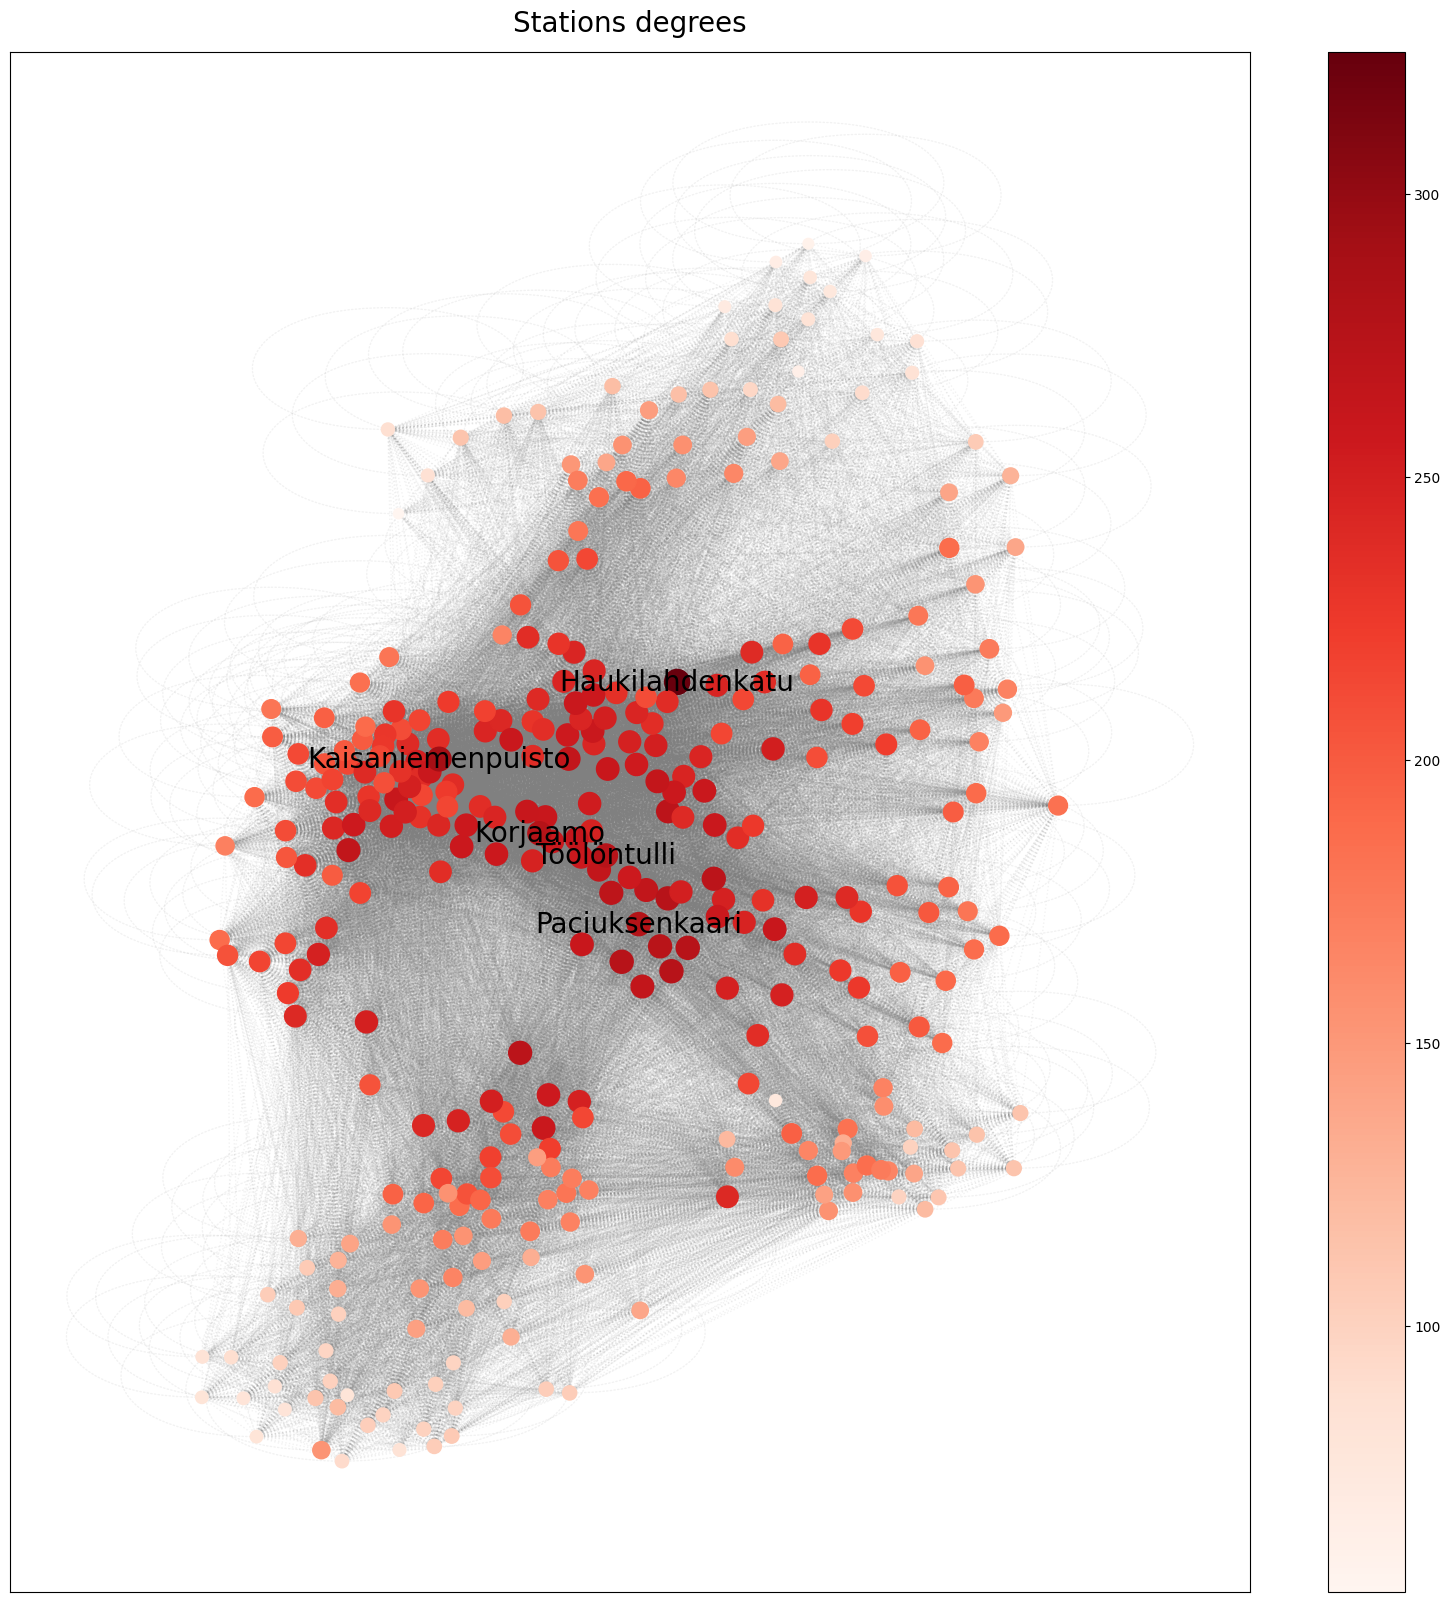

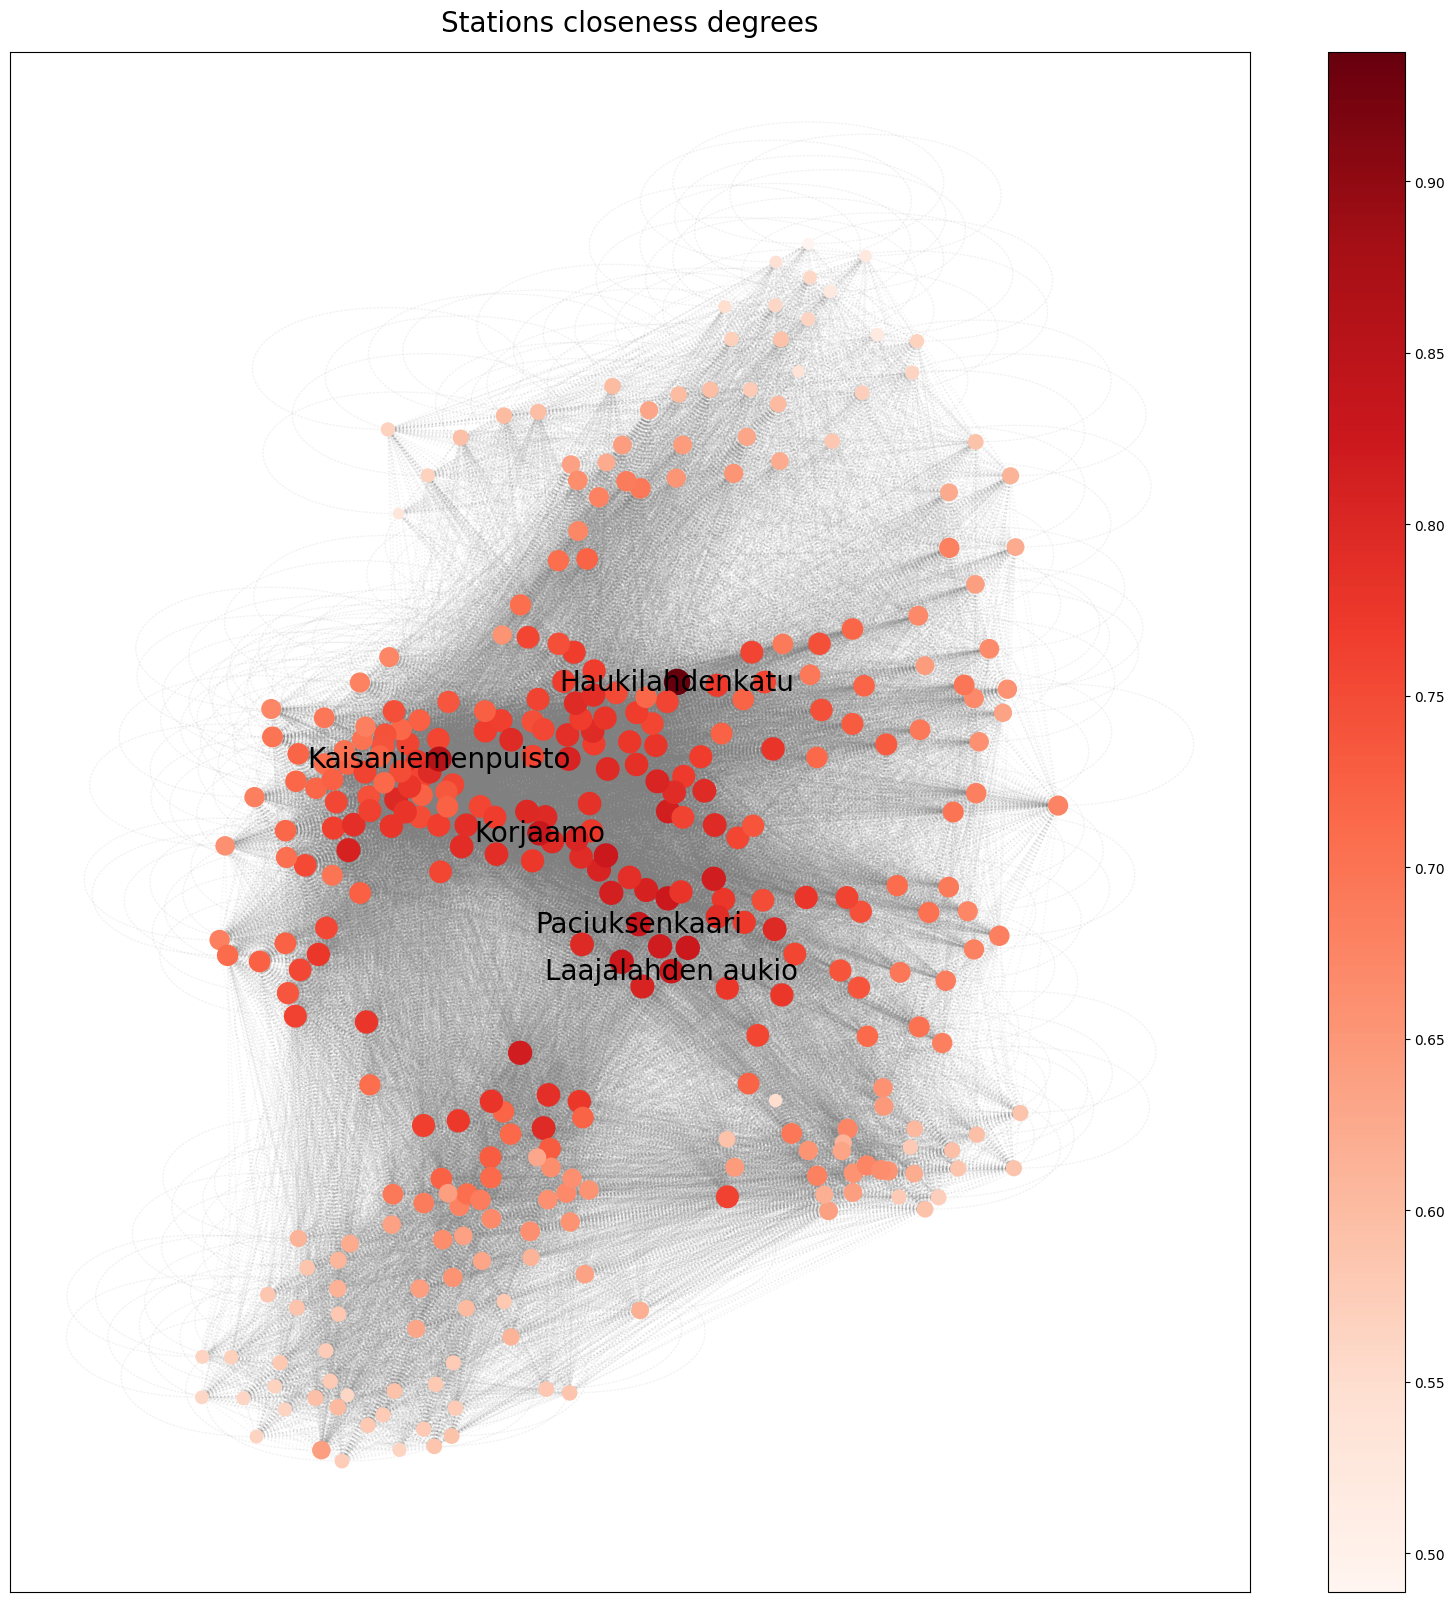

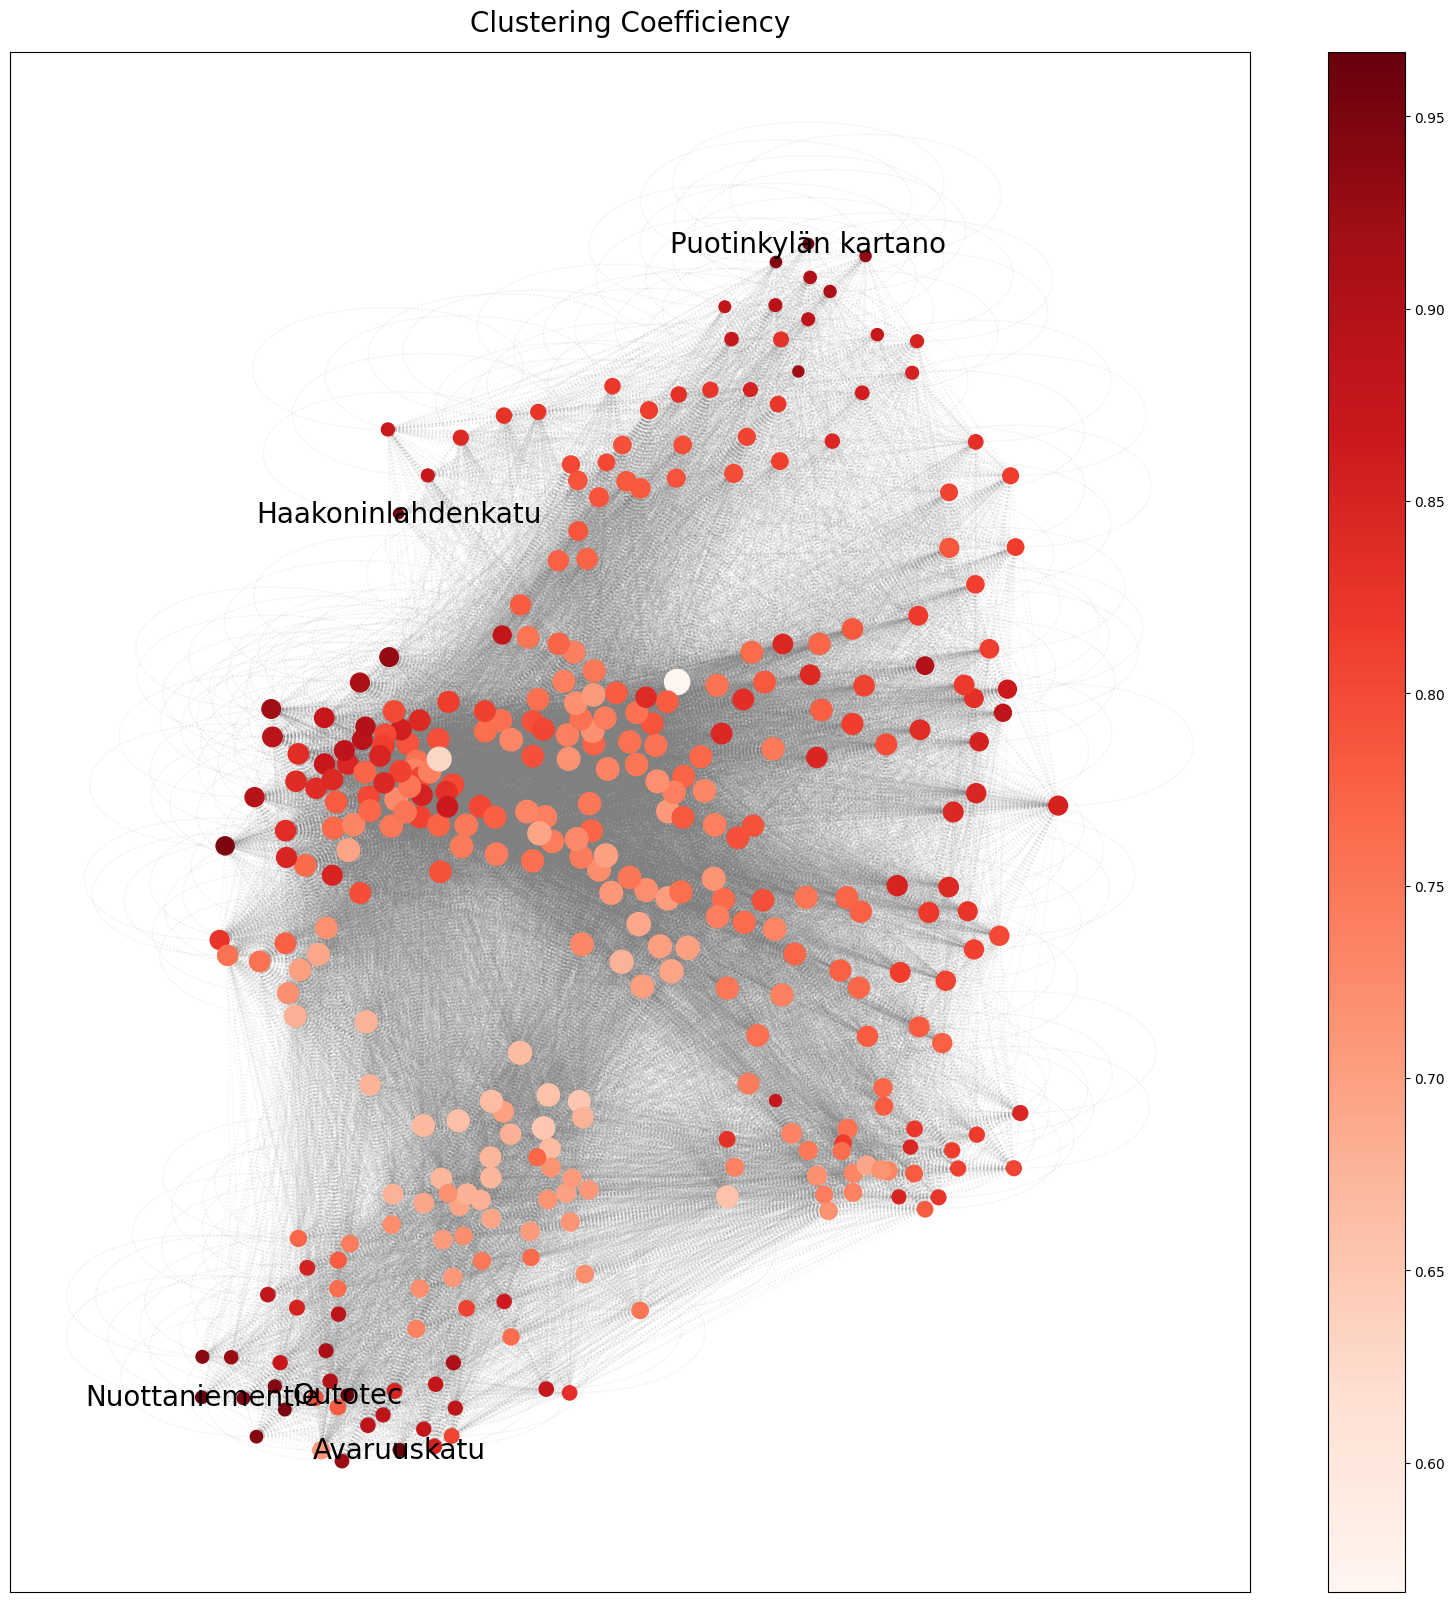

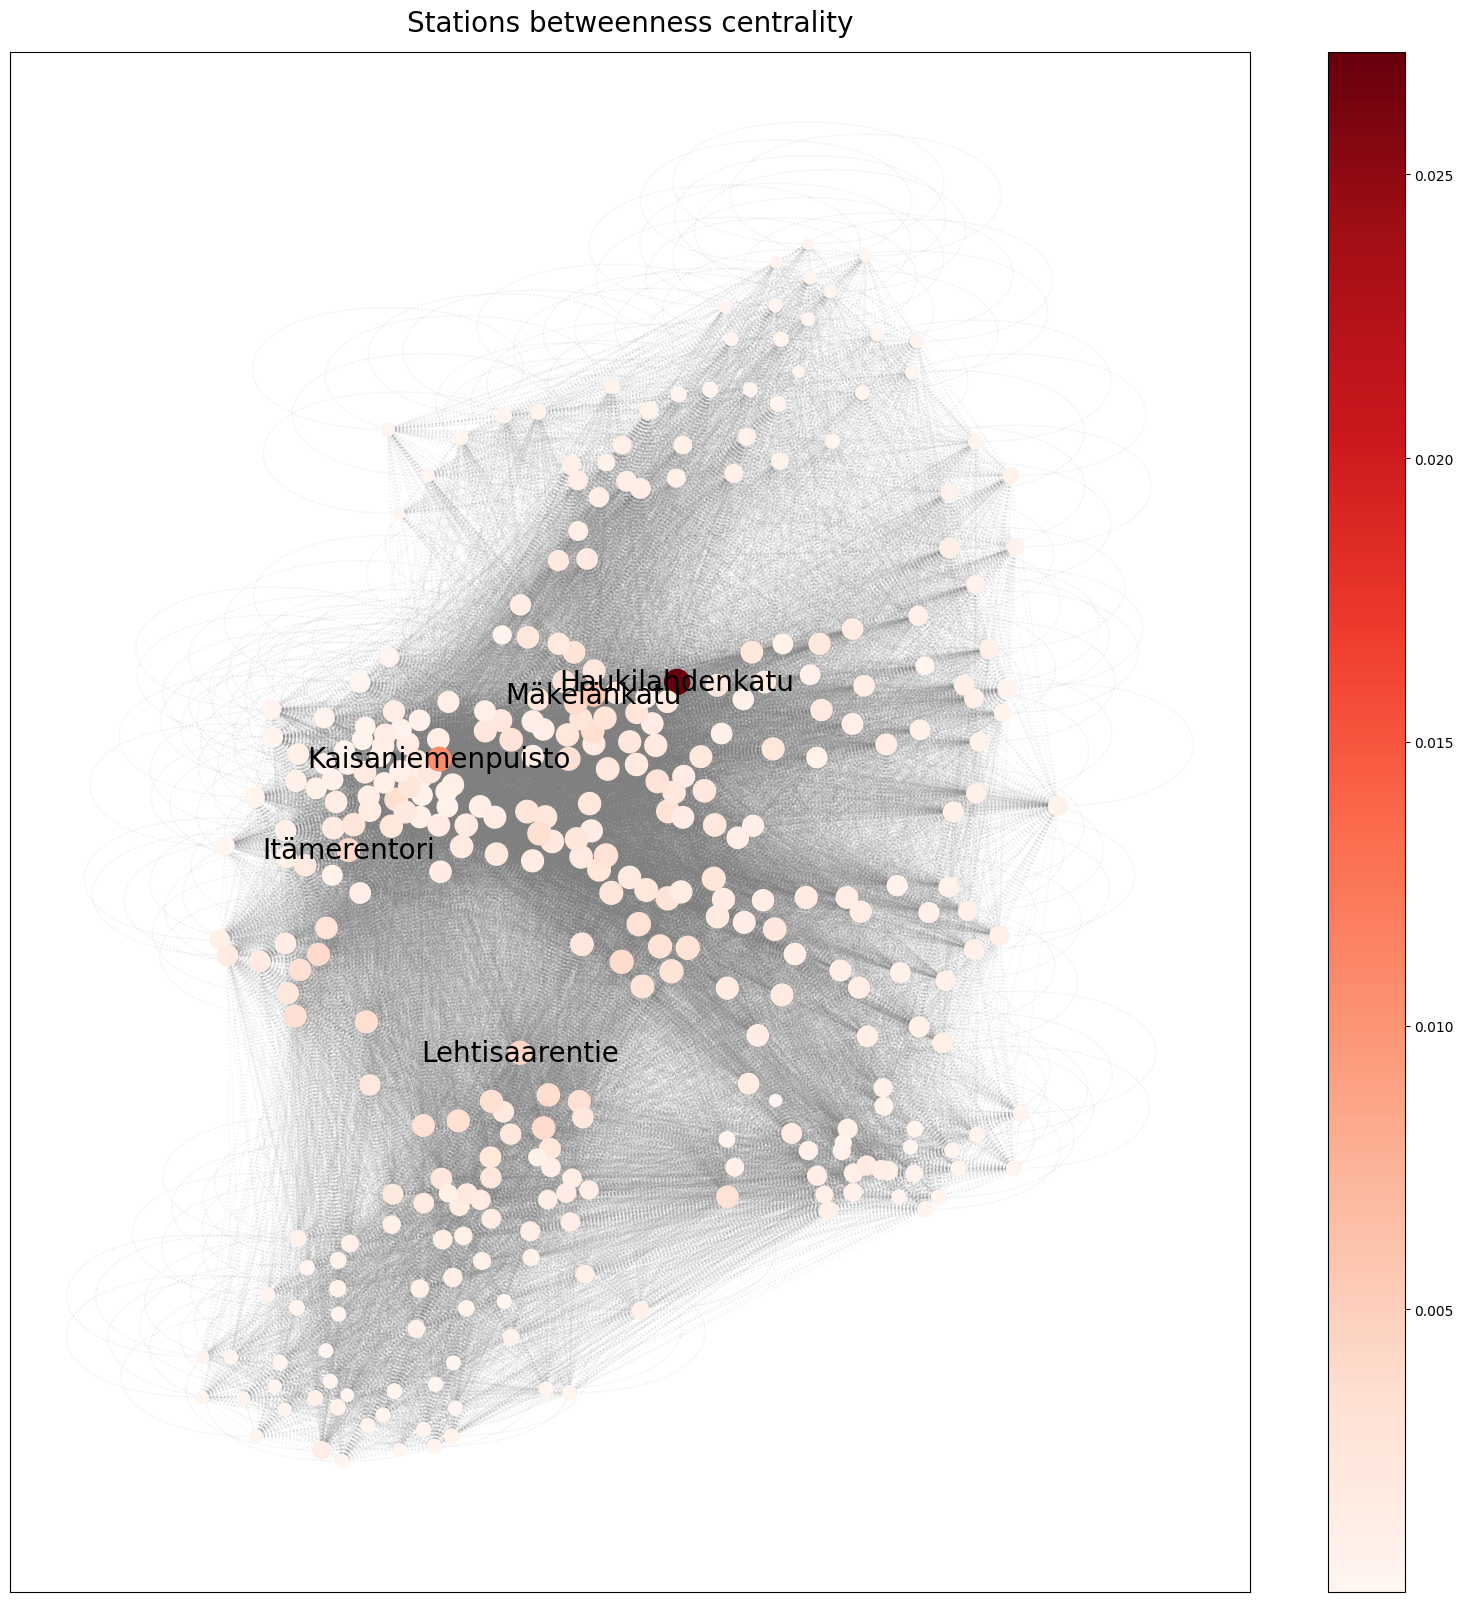

In [153]:

draw_graph(G,calc_node_size_basing_on_degree, "Stations degrees")

draw_graph(G,calc_node_size_basing_on_closeness, "Stations closeness degrees")

draw_graph(G, calc_node_size_basing_on_clustering_coefficiency, "Clustering Coefficiency")

draw_graph(G, calc_node_size_basing_on_betweenness_centrality, "Stations betweenness centrality")